In [1]:
import os
import jraph
import ase
import ase.io
import jax
import jax.numpy as jnp
import numpy as np

from phonax.trained_models import (
    NequIP_JAXMD_uniIAP_model,
    NequIP_JAXMD_uniIAP_PBEsol_finetuned_model,
    MACE_uniIAP_model,
    MACE_uniIAP_PBEsol_finetuned_model,
    NequIP_JAX_uniIAP_model,
)

from phonax.phonons import (
    predict_hessian_matrix,
    plot_bands,
    plot_phonon_DOS,
    crystal_struct_to_graph,
)

jax.config.update("jax_debug_nans", True)
jax.config.update("jax_debug_infs", True)
np.set_printoptions(precision=3, suppress=True)


# Phonon predictions for periodic crystals using pre-trained models

In this tutorial, we demonstrate how to use pre-trained energym models to make phonon predictions for the periodic crystals.
Below, we can choose from models based on NequIP / MACE, and trained with just universal-IAP dataset (PBE) or with additional PBEsol DFT fine-tuning as discussed in the work.

## step 1: Load the pre-trained model

In [2]:
# NequIP model trained with universal-IAP (PBE)
model_fn, params, num_message_passing, r_max = NequIP_JAXMD_uniIAP_model(os.path.join(os.getcwd(), 'trained-models'))

# NequIP model trained with universal-IAP (PBE) + PBEsol fine-tuning
#model_fn, params, num_message_passing, r_max = NequIP_JAXMD_uniIAP_PBEsol_finetuned_model(os.path.join(os.getcwd(), 'trained-models'))

# MACE model trained with universal-IAP (PBE)
#model_fn, params, num_message_passing, r_max = MACE_uniIAP_PBEsol_finetuned_model(os.path.join(os.getcwd(), 'trained-models'))

# MACE model trained with universal-IAP (PBE) + PBEsol fine-tuning
#model_fn, params, num_message_passing, r_max = NequIP_JAX_uniIAP_model(os.path.join(os.getcwd(), 'trained-models'))


Create NequIP (JAX-MD version) with parameters {'use_sc': True, 'graph_net_steps': 2, 'hidden_irreps': '128x0e+ 128x0o  + 64x1e +64x1o +64x2e +64x2o', 'nonlinearities': {'e': 'swish', 'o': 'tanh'}, 'r_max': 5.0, 'avg_num_neighbors': 36.712880186304396, 'avg_r_min': None, 'num_species': 100, 'radial_basis': <function bessel_basis at 0x7fa5820dcd60>, 'radial_envelope': <function soft_envelope at 0x7fa5820dccc0>}


## Step 2: Generate the extended graph for computation

In [3]:
atoms, graph = crystal_struct_to_graph(os.path.join('data','mp-149','mp-149.vasp'), r_max, num_message_passing)
#atoms = ase.io.read('mp-149.vasp')


## Step 3: Derive the second derivative Hessians of the extended graph

In [4]:
H = predict_hessian_matrix(params,model_fn,graph)


## Step 4: Phonon prediction results

### Phonon band spectrum
The function computes the phonon band spectrum along high-symmetry k path of the crystal structure.

100%|███████████████████████████████████████| 1000/1000 [02:09<00:00,  7.74it/s]


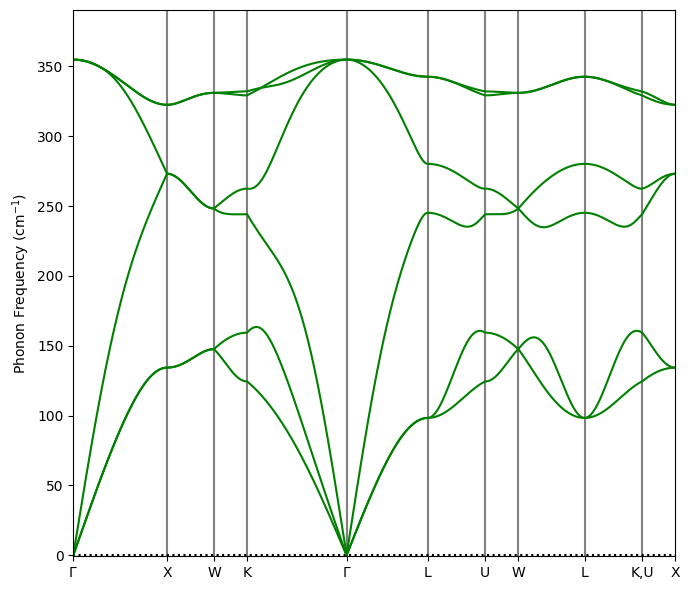

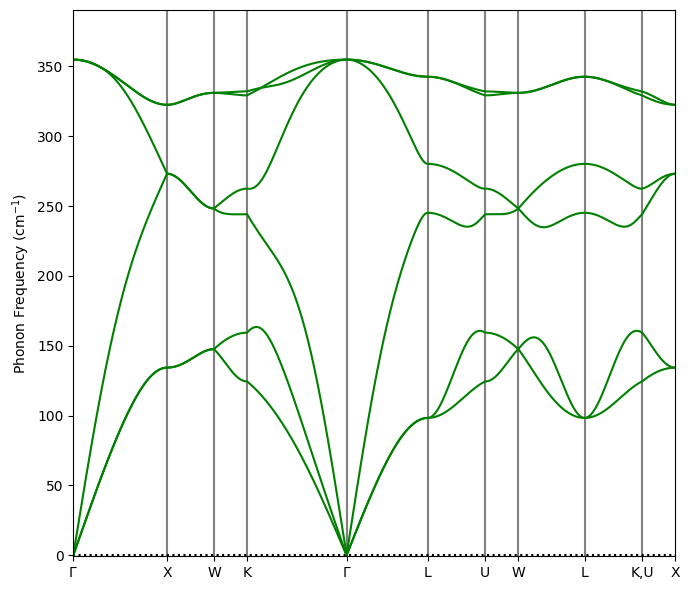

In [5]:
plot_bands(atoms, graph, H, npoints=1000)

### Phonon density of states

The last input parameter (BZ_sampling) gives the BZ sampling grid used for the numerical integrations

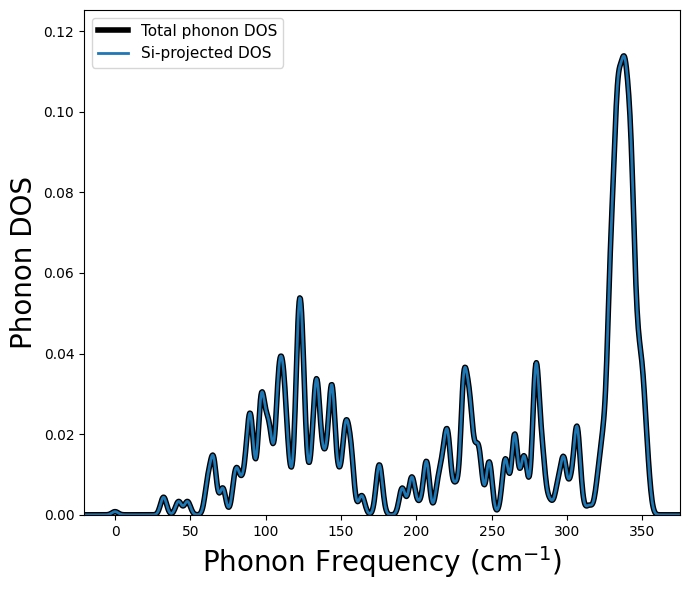

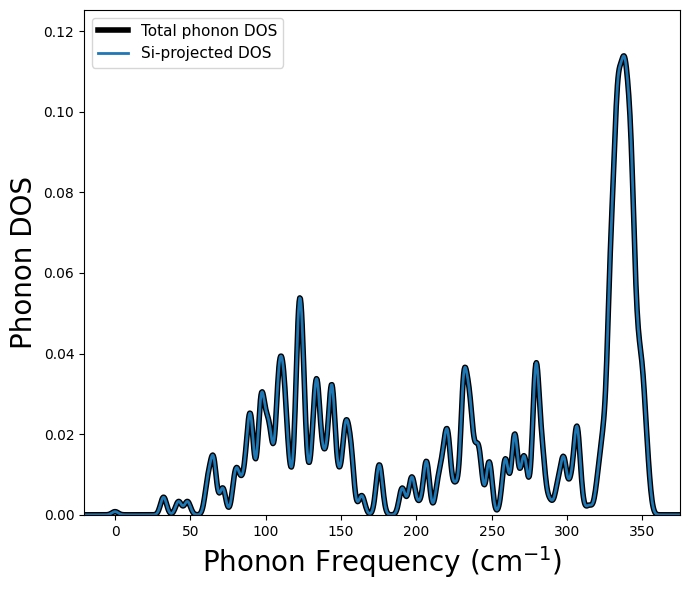

In [6]:
plot_phonon_DOS(atoms, graph, H, np.array([10,10,10]))